<a href="https://colab.research.google.com/github/Katsunori04/python_handson/blob/main/%E4%BD%8F%E5%AE%85%E4%BE%A1%E6%A0%BC%E4%BA%88%E6%B8%AC%E3%83%8F%E3%83%B3%E3%82%BA%E3%82%AA%E3%83%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
#外部ライブラリのインストール
!pip install pycaret==2.3.10 markupsafe==2.0.1 pyyaml==5.4.1 -qq

In [67]:
#外部ライブラリ
import pandas as pd
from pycaret.regression import *

In [70]:
#データの読み込み 本来はローカルのファイルパスを記述。今回はURL
df = pd.read_csv('https://raw.githubusercontent.com/Katsunori04/python_handson/main/house-prices-advanced-regression-techniques/train.csv')

In [69]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


**データの説明（一部）**  
MSSubClass： 住居のタイプ  
MSZoning： 住居のゾーン  
LotFrontage： 隣接した道路の長さ  
LotArea： 敷地面積  
Street： 道路のタイプ  
Alley： 路地のタイプ  
LotShape： 土地の形状  
LandContour： 土地の平坦さ  
Utilities： ガス・電気・水の利用  
LotConfig： 土地の構成  
LandSlope：土地の傾斜  
Neighborhood： 近所  

In [ ]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [ ]:
df.describe() #基本統計量の計算

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


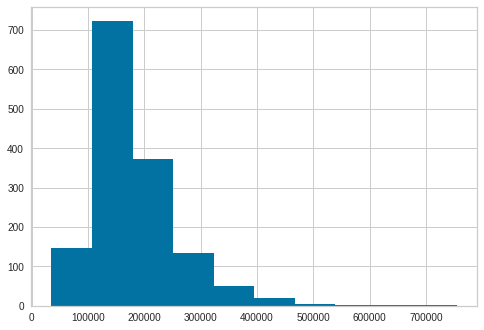

In [ ]:
df['SalePrice'].hist() #金額のヒストグラム

In [ ]:
df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].mean()) #LotFrontageの欠損値を平均値で埋める
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,2.505338
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,2.493950
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,2.510994
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,2.472277
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,2.520050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,2.490934
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,2.505923
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,2.525179
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,2.473548


In [ ]:
#もっと雑に平均値に置き換え
df = df.fillna(df.mean())
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,2.505338
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,2.493950
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,2.510994
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,2.472277
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,2.520050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,2.490934
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,2.505923
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,2.525179
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,2.473548


# PycaretによるAutoML

In [ ]:
pred_setup = setup(data = df, target = 'SalePrice', session_id=123) #データの読み込み、前処理の実行
#今時点でデータを7:3に分割してくれる。７割AIの学習用、３割AIの検証用

,Description,Value
0,session_id,123
1,Target,SalePrice
2,Original Data,"(1460, 81)"
3,Missing Values,True
4,Numeric Features,19
5,Categorical Features,61
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 404)"


In [ ]:
	best = compare_models() # AIモデルを比較する

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.0977,0.0202,0.1410,0.8784,0.0109,0.0082,0.663
lightgbm,Light Gradient Boosting Machine,0.1015,0.0220,0.1466,0.8691,0.0114,0.0085,0.302
rf,Random Forest Regressor,0.1061,0.0248,0.1556,0.8523,0.0121,0.0089,1.989
br,Bayesian Ridge,0.0965,0.0258,0.1534,0.8502,0.0117,0.0081,0.175
ridge,Ridge Regression,0.1004,0.0283,0.1610,0.8342,0.0123,0.0084,0.049
omp,Orthogonal Matching Pursuit,0.0954,0.0306,0.1633,0.8186,0.0124,0.0080,0.030
et,Extra Trees Regressor,0.1189,0.0309,0.1742,0.8145,0.0135,0.0099,2.171
ada,AdaBoost Regressor,0.1441,0.0362,0.1894,0.7790,0.0147,0.0120,0.402
lr,Linear Regression,0.1161,0.0393,0.1908,0.7648,0.0146,0.0097,0.271
en,Elastic Net,0.1270,0.0443,0.2013,0.7389,0.0153,0.0106,0.052


In [ ]:
best_model = create_model('gbr') #モデルを作成する

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1057,0.0301,0.1733,0.8447,0.0133,0.0088
1,0.0939,0.0195,0.1395,0.8590,0.0107,0.0078
2,0.0906,0.0173,0.1317,0.8807,0.0103,0.0076
3,0.0924,0.0178,0.1334,0.8733,0.0103,0.0077
4,0.1094,0.0317,0.1779,0.8608,0.0140,0.0093
5,0.0999,0.0184,0.1358,0.8838,0.0106,0.0084
6,0.0941,0.0142,0.1191,0.9003,0.0092,0.0078
7,0.0994,0.0187,0.1369,0.8937,0.0107,0.0083
8,0.1047,0.0193,0.1388,0.8966,0.0107,0.0087


In [ ]:
best_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
tuned_best_model = tune_model(best_model) #モデルのハイパーパラメータをチューニングする

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1114,0.0380,0.1949,0.8037,0.0150,0.0094
1,0.1007,0.0211,0.1451,0.8476,0.0112,0.0084
2,0.0948,0.0178,0.1334,0.8777,0.0104,0.0080
3,0.1020,0.0204,0.1430,0.8545,0.0110,0.0085
4,0.1180,0.0350,0.1870,0.8463,0.0146,0.0100
5,0.0999,0.0196,0.1398,0.8767,0.0110,0.0084
6,0.1015,0.0182,0.1348,0.8723,0.0104,0.0085
7,0.1076,0.0254,0.1593,0.8560,0.0125,0.0090
8,0.1088,0.0242,0.1557,0.8700,0.0120,0.0091


In [ ]:
predict_model(tuned_best_model) #検証データを使って予測精度の検証をしてみる

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,15898.8525,6.656007e+08,25799.2374,0.8838,0.1204,0.0876


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice,Label
0,69.354309,9505.0,2001.0,2001.0,180.0,0.0,0.0,884.0,884.0,884.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,222500,236620.440602
1,60.000000,9600.0,1900.0,1950.0,0.0,0.0,0.0,1095.0,1095.0,1095.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,87000,121011.288789
2,32.000000,3363.0,2004.0,2004.0,117.0,0.0,0.0,976.0,976.0,976.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,130000,145804.836629
3,75.000000,9750.0,1998.0,1998.0,0.0,975.0,0.0,133.0,1108.0,1108.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,274300,253447.375568
4,60.000000,10930.0,1945.0,1950.0,0.0,580.0,0.0,333.0,913.0,1048.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,140000,140558.095891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,60.000000,6882.0,1914.0,2006.0,0.0,0.0,0.0,684.0,684.0,773.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,127000,117786.784863
435,50.000000,6000.0,1954.0,1954.0,0.0,0.0,0.0,811.0,811.0,811.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,93000,116668.606840
436,80.000000,10240.0,2005.0,2005.0,178.0,0.0,0.0,1030.0,1030.0,1038.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,275500,273583.081539
437,85.000000,10625.0,2003.0,2004.0,292.0,866.0,0.0,132.0,998.0,1006.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,284000,289113.148011


In [ ]:
final_lightgbm = finalize_model(tuned_best_model) #学習データと検証データをすべて使って、最終のモデルを学習する

In [ ]:
evaluate_model(final_lightgbm) #モデルを様々な観点で評価する

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…